# FFT implementation from scracth
***
**Federal University of Campina Grande (Universidade Federal de Campina Grande)**

Author: **João Pedro Melquiades Gomes**

Email: **joao.melquiades@ee.ufcg.edu.br**
***

## The Big Problem
***

As we saw in the **"DFT Implementation from scracth"** notebook, the DFT complexity is quadratic. ONce we increase the number of the DFT, the time to compute the result increases drastically. The big idea is: Maybe there is one way that we can cut the complexity to increase performance, while computing the same result. This is achieved by FFT.

But first, I will take an approach very different from the usual in our Engineering course. I will take a more mathematical approach to help understand this beautiful algorithm ,then I will try to implement my own FFT. Lets go!

## Polynomial representation
***

Okay, let's suppose we have an polynomial of $n_{th}$ grade. We are interested in two representation forms to understand the FFT:

- Coefficients
- Points

Let's take this example:

$$A(x) = 5x^3 + 3x^2 + x + 3$$

In coefficient representation, we have an array: $[3, 1, 3, 5]$, where the index $i$ represents the coefficient of $x^i$.

However, the point representation wants to represent the same polynomial with a given number of points. There is one mathematical theorem that says that if we have any polynomial of $n_{th}$ grade, we need $N+1$ points to fully represent it. So, in the case of a polynomial with grade 3 $A(x)$, we need four points to full represent it. So, in order to evaluate, we do:

$$Â(k) = 5x_k^3 + 3x_k^2 + x_k + 3$$

Where, $Â(k)$ is the coordinate value of the $x_k$ choosed point. Let's take this into a matricial form:



$$\mathbf{A} = \begin{bmatrix}
x_0^3 & x_0^2 & x_0^1 & x_0^0\\
x_1^3 & x_1^2 & x_1^1 & x_1^0\\
x_2^3 & x_2^2 & x_2^1 & x_2^0\\
x_3^3 & x_3^2 & x_3^1 & x_3^0\\
\end{bmatrix}
\begin{bmatrix}
5\\ 
3\\ 
1\\ 
3\\ 
\end{bmatrix}$$

If we make this matrix multiplication, we have all four values that fully represents the polynomial $A(x)$. Let's analyse the complexity of this problem:

For each line, we have $4$ multiplications and $4$ additions. Once we have $4$ lines, we need to make $16$ multiplications to fully evaluate the polynomial $A(x)$. If we expand this to an arbitrary $P(x)$ with grade $N$, we will need $N^2$ multiplications, letting us with a problem with complexity of $O(n^2)$. The magic here is there is one way that we can cut this multiplications, and this relays in some beautiful properties. Let's start talking about it

### Even and Odd functions
***

Okay, we want to reduce the number of multiplications, alright? So, maybe there is one way that if we choose one point $x_k$, it can be used to easily calculates more than one point with only one evaluation...


#### Even functions

Assume the function:

$$f(x) = x^2$$

If we choose a $x_k = -1$, the evaluation is $f(-1) = 1$. But if we choose $x_k = 1$, the evaluation is $f(1) = 1$. Wow, we have the same evaluation to two different values of $x_k$, and calculating to only one, we have the other!. This is a property of even functions:

$$f(-x) = f(x)$$

#### Odd functions

Now, assume the following function:

$$g(x) = x^3$$

If we choose $x_k = -1$, we have $g(-1) = -1$. If we choose $x_k = 1$, we have $g(1) = 1$. Note that we have the same value but inverted to two different values of $x_k$. So, we only need to evaluate once and to achieve the other evaluation we just invert the result, that is so more simple than making more N multiplications. This is another property that we are interested: To an odd function:

$$f(-x) = -f(x)$$

Okay, now we have the two main tools to start trying to divide the problem.


### Divide and conquer
***

#### Divide
we can divide our $A(x)$ into two polynomials, the terms with even dregree and the terms with odd degree:

$$P(x) = (3x^2 + 3) + (5x^3 + x)$$

And we can turn the odd degree term into a even degrem term:

$$P(x) = (3x^2 + 3) + x(5x^2 + 1)$$

We have divided our problem into two new polynomials:

$$P(x) = P_e(x^2) + xP_o(x^2)$$

Now, if we choose to this case four points that are paired, like ${-2, -1, +1, +2}$, when we split the problem into two $x^2$ polynomials, with squared degree terms only, this set of data reduces to ${1, 2}$. So we have to evaluate two smaller polynomials with half of the terms, and we will have the relation:

$$P(x_k) = P_e(x_k^2) + x_kP_e(x_k^2)$$
$$P(-x_k) = P_e(x_k^2) - x_kP_e(x_k^2)$$

We only have to make half of the multiplications, the other half is achieved by inverting one of the terms.




#### Conquer? Not yet

Okay, but what we do next? We have the same problem. We want to evaluate t $P_e(x^2)$ and $P_o(x^2)$, so I think you are saying: "Just split again into even and odd terms". Okay, let's do it to $P_e(x^2)$. We will have:

$$P_e(x^2) = P_e(x^4) + x^2P_o(x^4)$$

So, if we take the second set of coefficents ${1, 2}$, we need to square again, and we will achieve ${1, 16}$. Did you catch the problem? This time, the number of coefficients hasn't fallen. We had two coefficients to $x^2$ and got two coefficients to $x^4$. Maybe there is one way to assure that every time we square a entire set of data, the new size becomes half of the current size? The answer relies on Complex Numbers (Don't worry, we will code our first lines of code very soon)

### Complex Numbers and the unit circule
***

If we remember the main addition of complex numbers is the $i$. The way this number is defined results in $i^2 = -1$. So, let's take the same problem again, we will try to evaluate $P(x)$, but now, let's take the points: ${-i, -1, +1, +i}$. I won't write down the equations again, but at this point, we can say that if we square this terms to evaluate $P_e(x^2)$ we will have ${-1, +1}$, right? Now, if we square again to evaluate $P_e(x^4)$, we will have ${1}$. Okay, take a breath, we are almost there! We did the magic of squaring the coefficients two times, and at the end we have a problem of size $4/4$. At each stage, we need to make the half of the multiplications, letting us with a problem of complexity $O(nlog_2(n))$.

If we expand the idea, we can calculate the $\sqrt[n]1 $, and we will have the first points that will always split until reachs a problem of evaluation with only one term. Let's comprove this with some code. Oh yeah!

In [1]:
%matplotlib widget
import ipympl
from IPython.display import HTML, Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.animation as ani # Let's do some cool stuffs here
import seaborn as sns
import time
sns.set_theme()

We want:
- Create an array containing all N-roots of unity
- Create an array that goes from 0 to N

In [2]:
N = 16
# Roots
aux_array = np.zeros(N+1)
aux_array[0] = 1
aux_array[-1] = -1

roots = np.roots(aux_array)

# array of powers
aux_array = np.arange(1, N+1)
interval_between_integers = N
size_after_interp = (aux_array.size - 1)*interval_between_integers + 1
power_array = np.interp(np.arange(size_after_interp), np.arange(size_after_interp, step=interval_between_integers), aux_array)
aux_array_2 = np.repeat(2**np.arange(0, np.log2(N)+1), N)
power_array = np.concatenate((power_array, aux_array_2))
power_array.sort()


In [3]:

# Creating the graph:
rc('animation', html='html5')
fig, ax = plt.subplots(figsize=(8,8))

dots = ax.scatter((roots**power_array[0]).real, (roots**power_array[0]).imag, color='red')
color = 'red'
pause = 0
next_sleep = 0

def step_root(i):
        
    global color 
    ax.cla()
    ax.set_xlabel('Real')
    ax.set_ylabel('Imag')
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_title(f'Powers of N-roots of Unity - Power = {power_array[i]}')

    if(np.log2(power_array[i]) == int(np.log2(power_array[i]))):
        color='green'

    else:
        color='red'

    dots.set_ydata = plt.scatter((roots**power_array[i]).real, (roots**power_array[i]).imag, color=color)

    return dots

animator = ani.FuncAnimation(fig, step_root, interval=50, blit=True, save_count=power_array.size)
writergif = ani.PillowWriter(fps=30) 
animator.save('./animation.gif', writer=writergif)
plt.close()

Note that to each value that is a power of two, the number of points decreases to the half of the previous power of two. Besides, we have a symetry between the points, so we only need to calculate the N/2 first points and the other N/2 are only the inverse.

![Gif](figures/animation.gif)

Okay, so back to theory. We can represent these complex numbers that are the N-roots of Unity as:

$$W_N = e^{-j\frac{2\pi}{n}}$$

So, in order to evaluate A(x), we have:

$$Â[k] = \sum_{n=0}^{N-1}x[n]W_N^{nk}$$

Where:
- $x[n]$ represents the coefficients of the polynomial
- $W_N$ represents the choosed points to evaluate the polynomial

And here we have our DFT equation again, but obtained from polynomial evaluation! That's beautiful!


## Implementing the FFT
***

So, in order to implement the FFT, I will define some list of specifications that I want that in my FFT in order to considering it complete:

- Given a power of two filter size, the object FFT is created;
- Given a non-power of two filter, padd with zeros until reachs a power of two at object creation moment;
- Given a filter size, checks if it is an integer value after the object creation moment;
- Given a filter size, compute the N/2 "evaluation points" at the object creation moment;
- Compute a FFT of size one
- Compute a FFT of size two
- Compute a FFT of size four
- Compute a FFT of size eight

Acceptance critteria:

- FFT of an impulse
- FFT of an cosine
- FFT of a shifted impulse
- FFT of a shifted cosine
- FFT of a modulated cosine

The list of specifications will be granted with TDD (Test Driven Development). The Acceptance critteria will be checked in this notebook, importing the file that contains the FFT implementation.

### Testing a Impulse signal
***

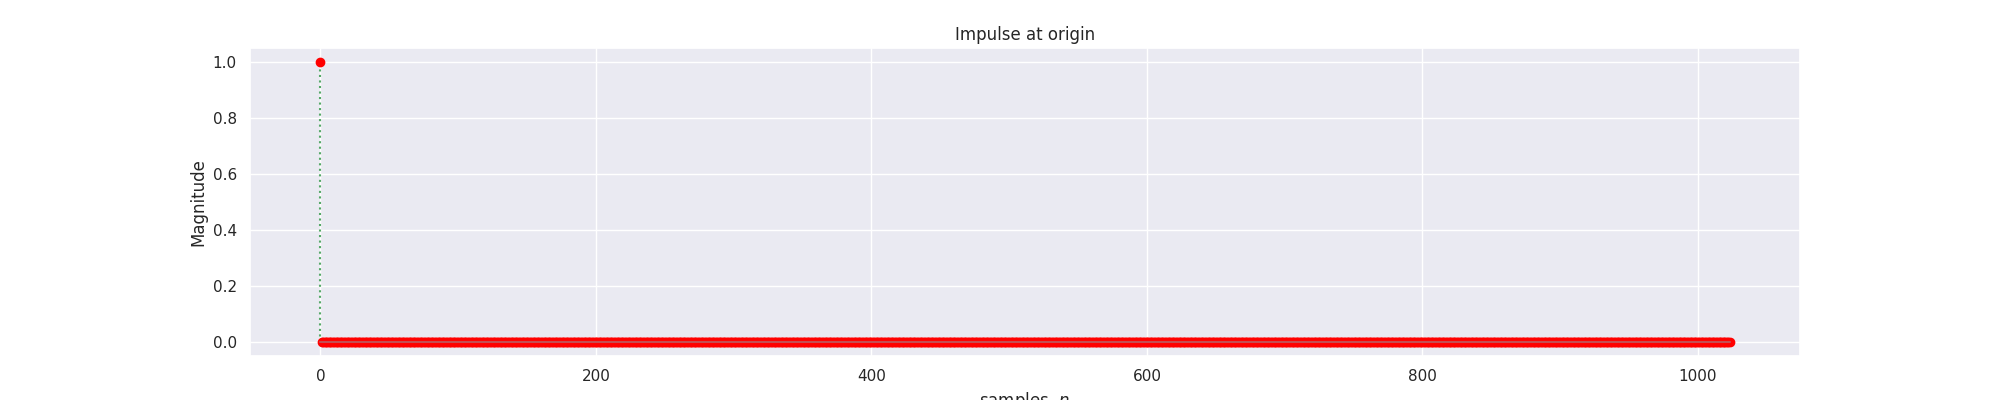

In [4]:
from fft_lib.fft import *
from scipy.fft import fft, ifft
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme()

# Defining the signal
N = 1024
delta_t = np.zeros(N)
delta_t[0] = 1

# Defining the X-axis
n = np.arange(N)

# computing the FFT
scipy_fft = fft(delta_t)
my_fft_obj = FFT(N)
my_fft = my_fft_obj.fft_calc(delta_t)

plt.figure(figsize=(20,4))
plt.stem(n, delta_t, linefmt=':g', markerfmt='red')
plt.title('Impulse at origin')
plt.xlabel('samples, $n$')
plt.ylabel('Magnitude')
plt.show()

In [5]:
# Defining a function to plot the magnitude and phase of FFT

def plot_fft_comparison(y1, y2, k, func_name, max_k=0):

    max_k = k.size if max_k == 0 else max_k


    fig, ax = plt.subplots(2, 1, figsize=(20, 10))
    ax[0].stem(k, np.abs(y1), linefmt=':g', markerfmt='blue')
    ax[0].stem(k, np.abs(y2), linefmt=':g', markerfmt='red')

    ax[1].stem(k, np.angle(y1, deg=True), linefmt=':g', markerfmt='blue')
    ax[1].stem(k, np.angle(y2, deg=True), linefmt=':g', markerfmt='red')

    # Titles, labels, etc

    ## Magnitude
    ax[0].legend(['Scipy FFT', 'My FFT'])
    ax[0].set_title(f'{func_name} - Magnitude')
    ax[0].set_xlabel('samples, $k$')
    ax[0].set_ylabel('Magnitude, absolute values')
    ax[0].set_xlim(0, max_k)

    ## Phase
    ax[1].legend(['Scipy FFT', 'My FFT'])
    ax[1].set_title(f'{func_name} - Phase')
    ax[1].set_xlabel('samples, $k$')
    ax[1].set_ylabel('Phase, °')
    ax[1].set_xlim(0, max_k)


    plt.tight_layout()
    

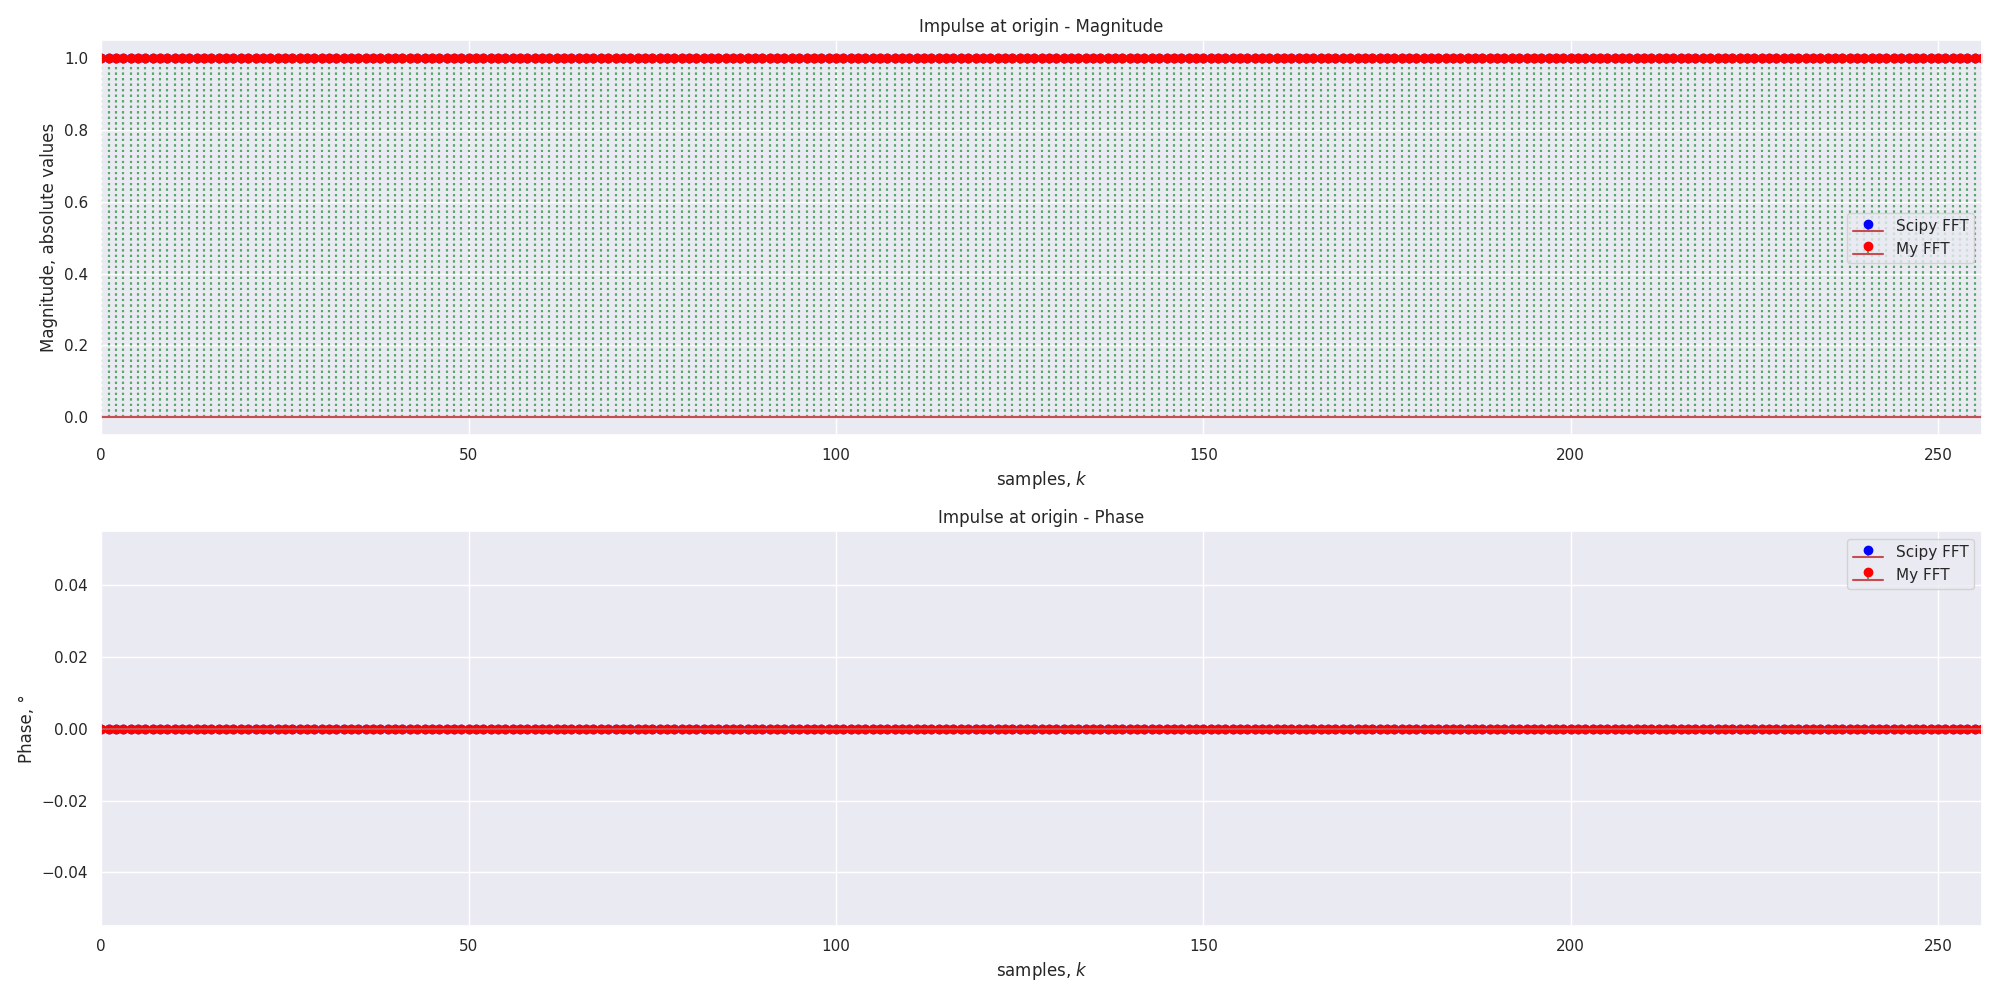

In [6]:
plot_fft_comparison(scipy_fft, my_fft, n, 'Impulse at origin', max_k=256)

### Cosine function
***

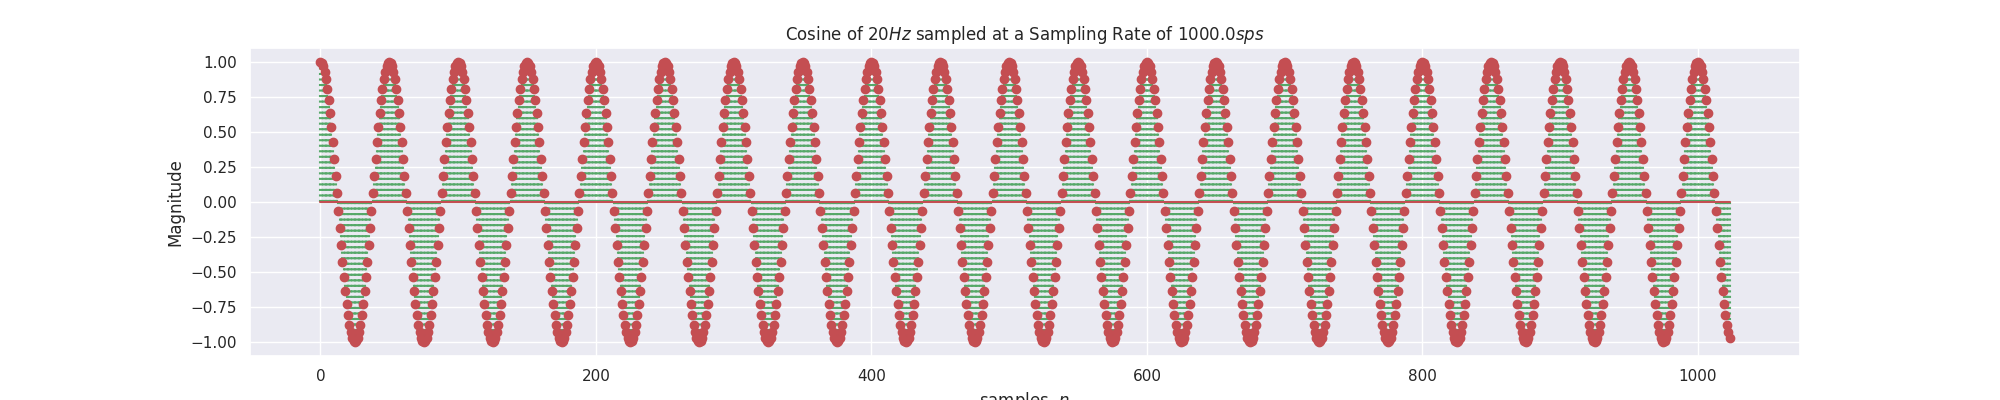

In [7]:
Fs = 1e3 #sps
f = 20 # Hz
cosine = np.cos(2*np.pi*f*n/Fs)

plt.figure(figsize=(20,4))
plt.stem(n, cosine, linefmt=':g', markerfmt='ro')
plt.title(f'Cosine of ${f}Hz$ sampled at a Sampling Rate of ${Fs}sps$')
plt.xlabel('samples, $n$')
plt.ylabel('Magnitude')
plt.show()

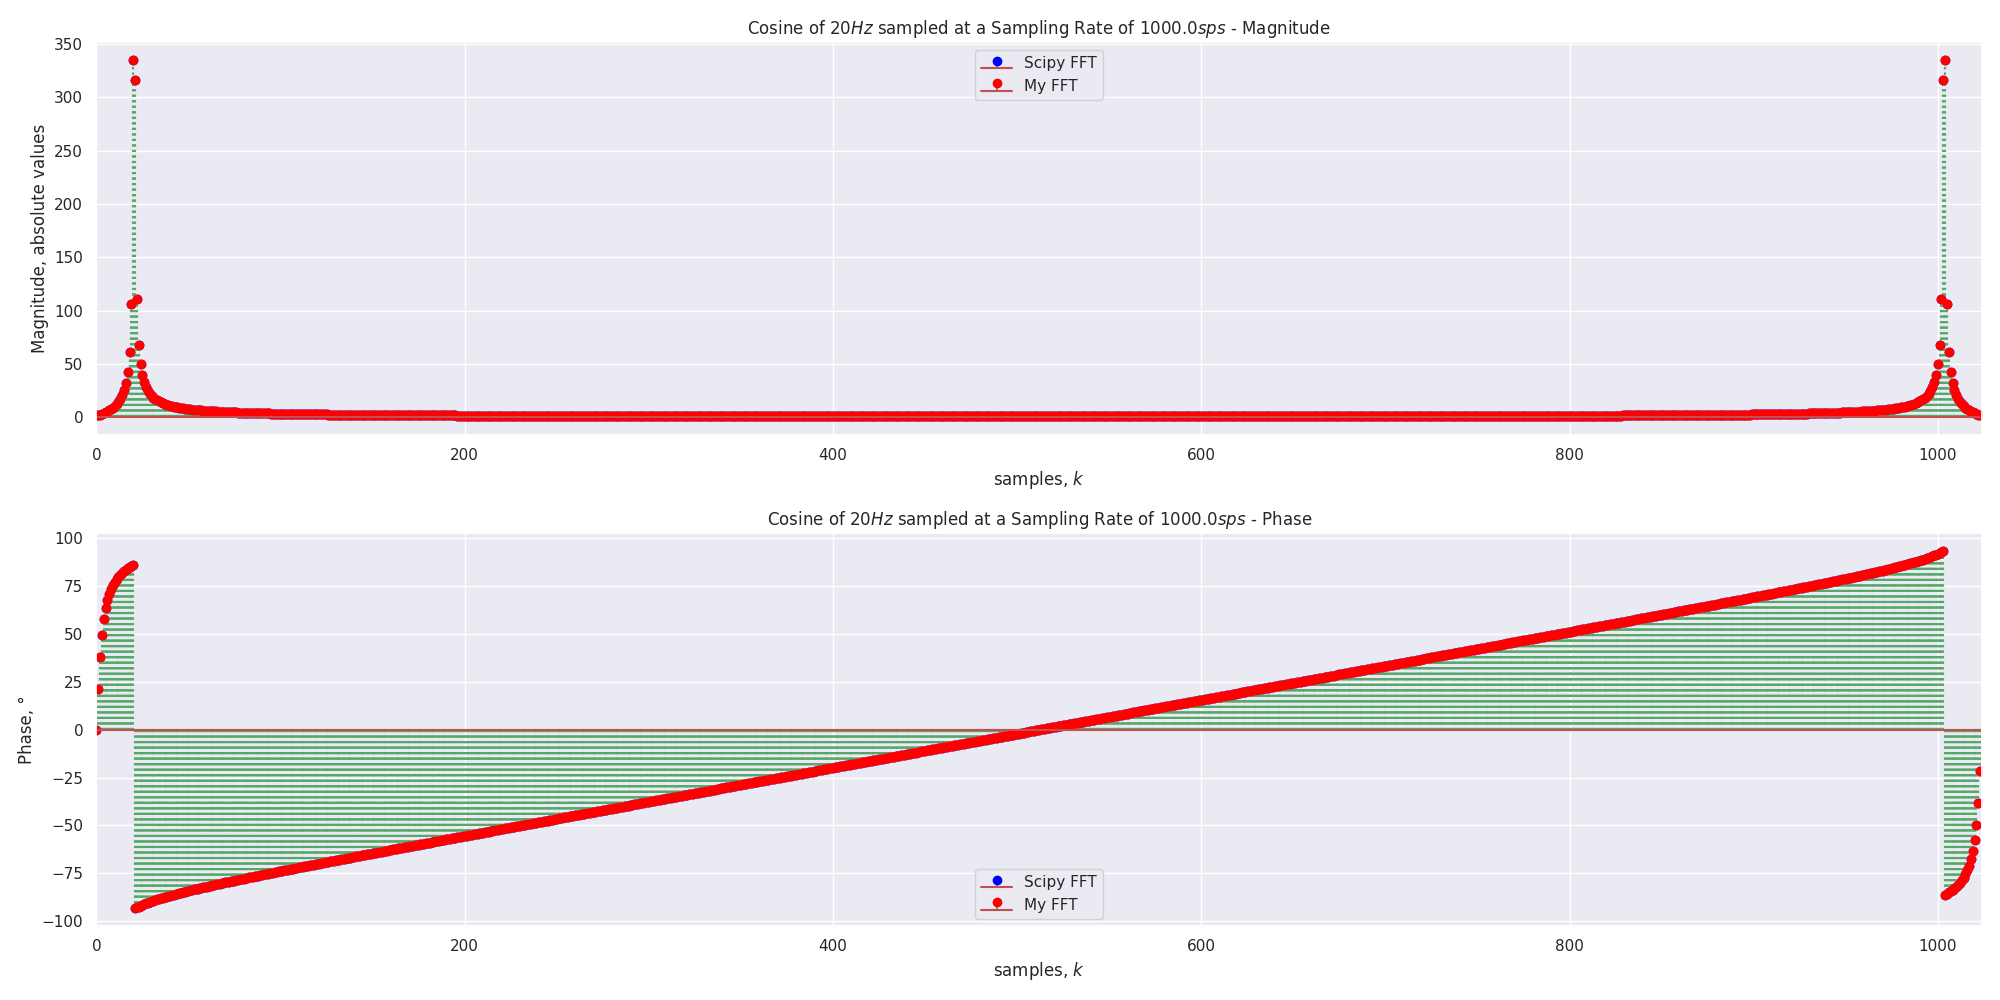

In [8]:
scipy_fft = fft(cosine)
my_fft = my_fft_obj.fft_calc(cosine)
plot_fft_comparison(scipy_fft, my_fft, n, f'Cosine of ${f}Hz$ sampled at a Sampling Rate of ${Fs}sps$')

### Shifted impulse
***

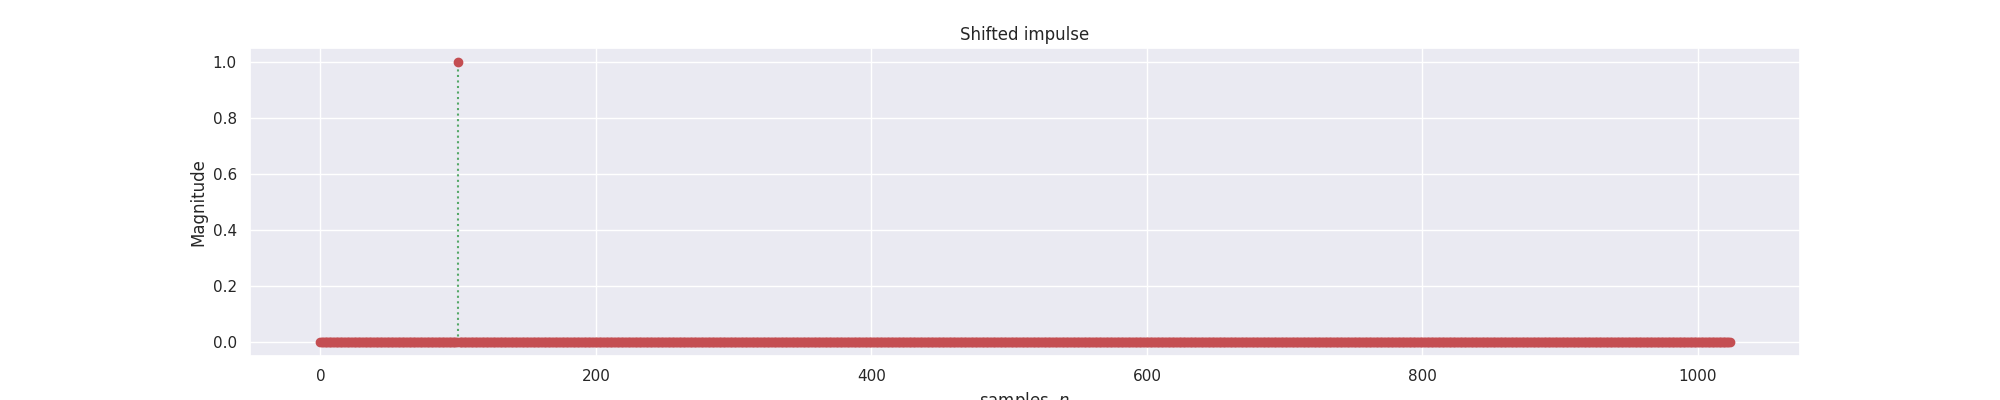

In [9]:
shift_value = 100

shifted_impulse = np.zeros(N)
shifted_impulse[shift_value] = 1

plt.figure(figsize=(20,4))
plt.stem(n, shifted_impulse, linefmt=':g', markerfmt='ro')
plt.title('Shifted impulse')
plt.xlabel('samples, $n$')
plt.ylabel('Magnitude')
plt.show()


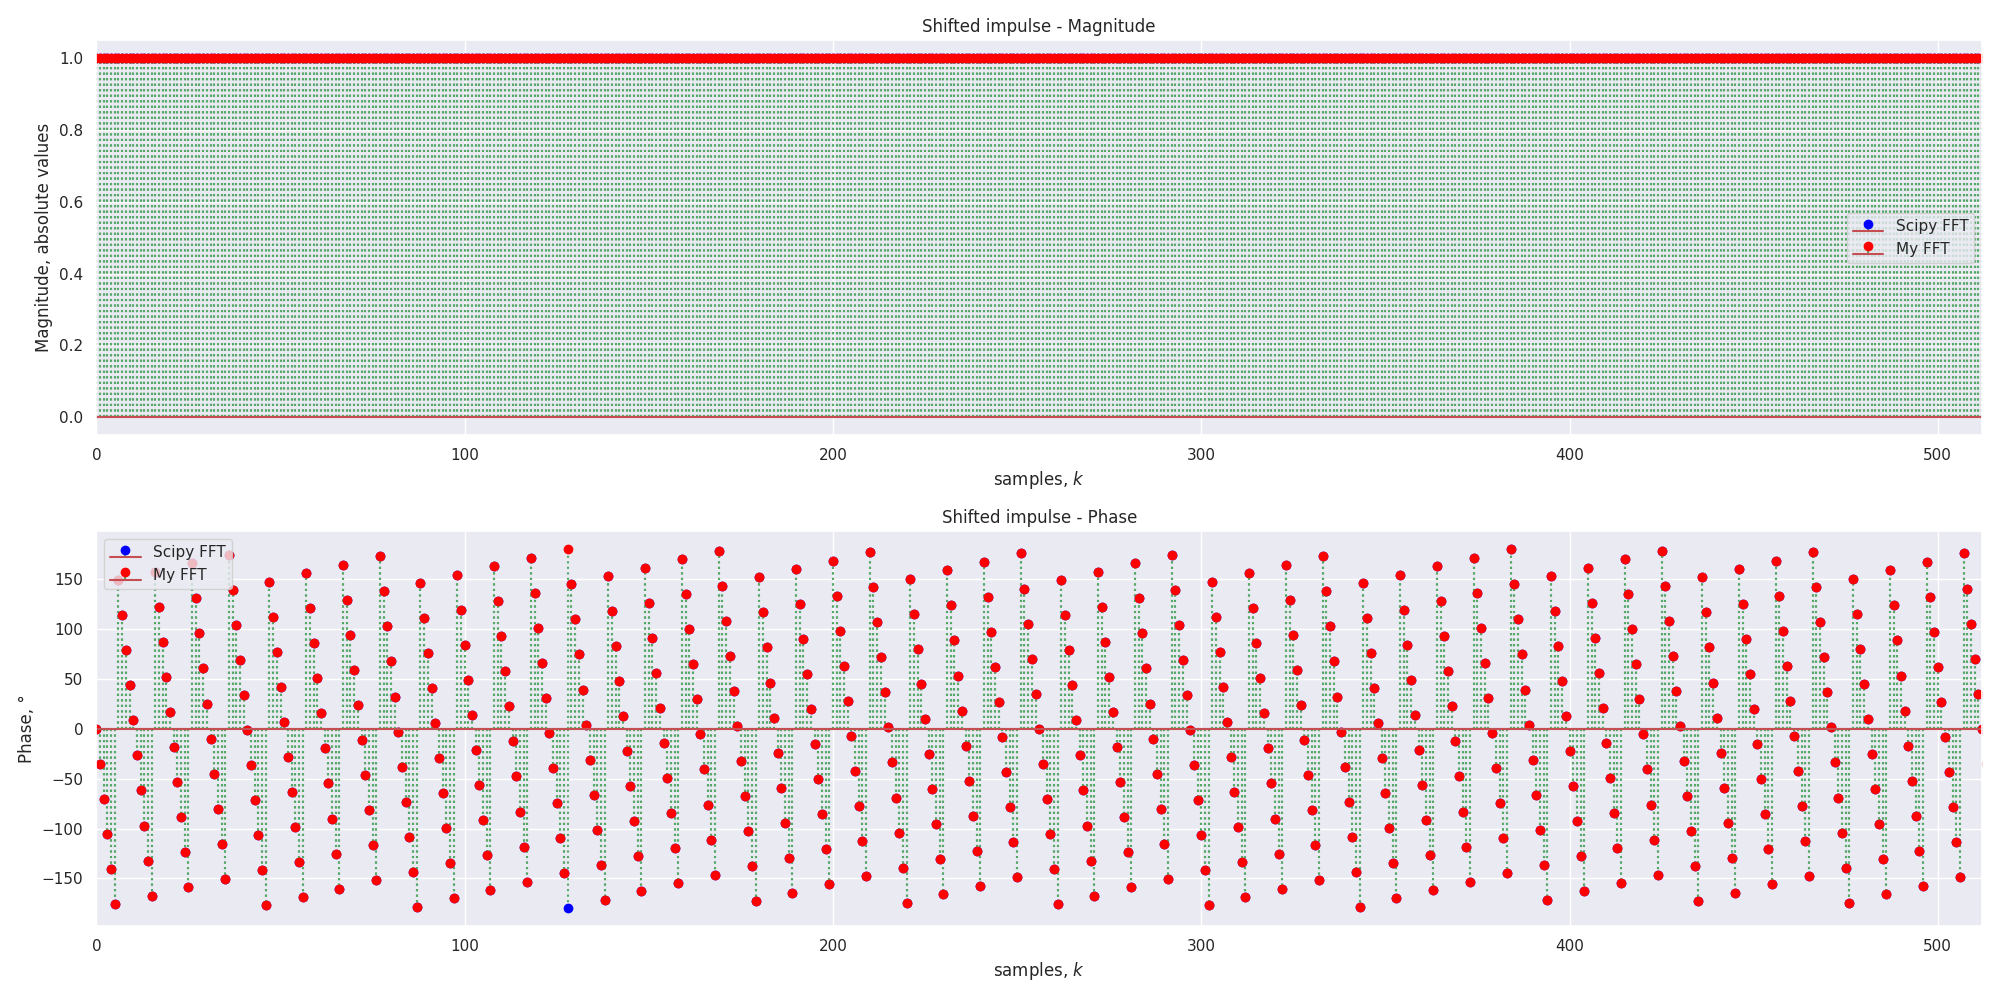

In [10]:
# The phase must be different of zero.

scipy_fft = fft(shifted_impulse)
my_fft = my_fft_obj.fft_calc(shifted_impulse)
plot_fft_comparison(scipy_fft, my_fft, n, 'Shifted impulse', max_k=512)

In [11]:
# The different value at K=128 isn't an error. Look:

print(f'Value of Scipy FFT at K=128: {scipy_fft[128]}')
print(f'Value of my FFT at K=128: {my_fft[128]}')

# Now, look the value of the angle of this two values
print(f'Value of Scipy FFT phase at K=128: {np.angle(scipy_fft[128], deg=True)}')
print(f'Value of my FFT at  phase K=128: {np.angle(my_fft[128], deg=True)}')

# So, because of the -0j and the +0j, the angle is -180° or +180°, but we know that these two values are the same

Value of Scipy FFT at K=128: (-1-0j)
Value of my FFT at K=128: (-1+0j)
Value of Scipy FFT phase at K=128: -180.0
Value of my FFT at  phase K=128: 180.0


### Shifted cosine
***

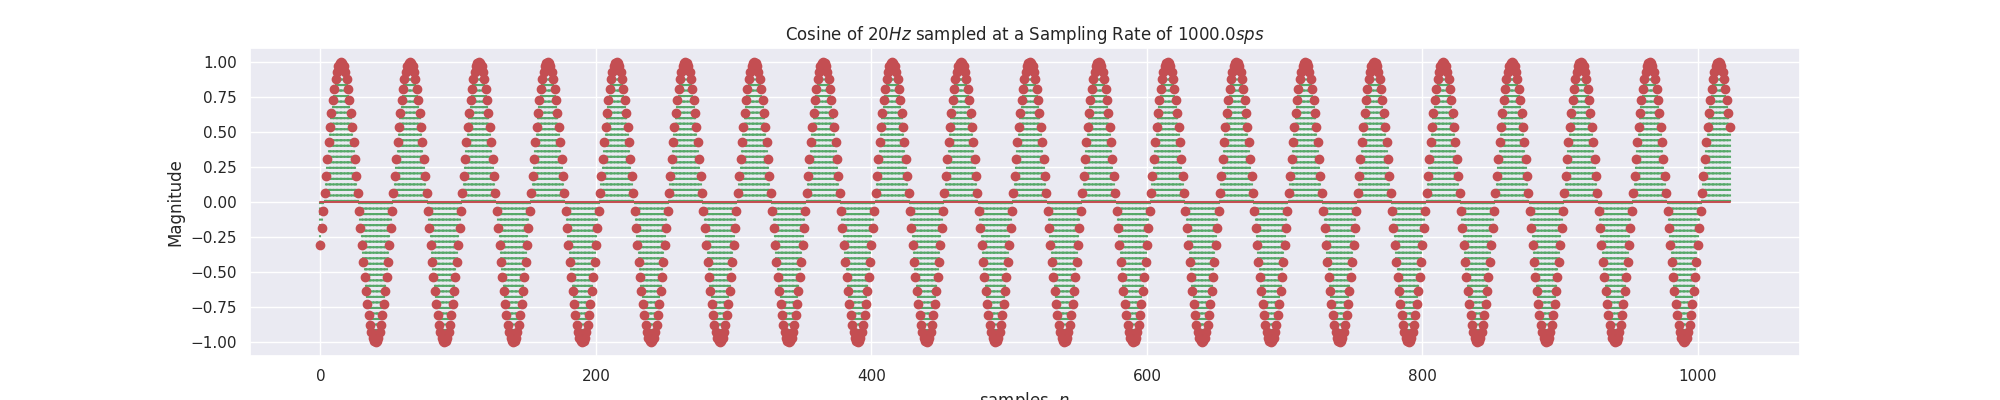

In [12]:
shift_value = 15
shift_cosine = np.cos(2*np.pi*f*(n-shift_value)/Fs)

plt.figure(figsize=(20,4))
plt.stem(n, shift_cosine, linefmt=':g', markerfmt='ro')
plt.title(f'Cosine of ${f}Hz$ sampled at a Sampling Rate of ${Fs}sps$')
plt.xlabel('samples, $n$')
plt.ylabel('Magnitude')
plt.show()

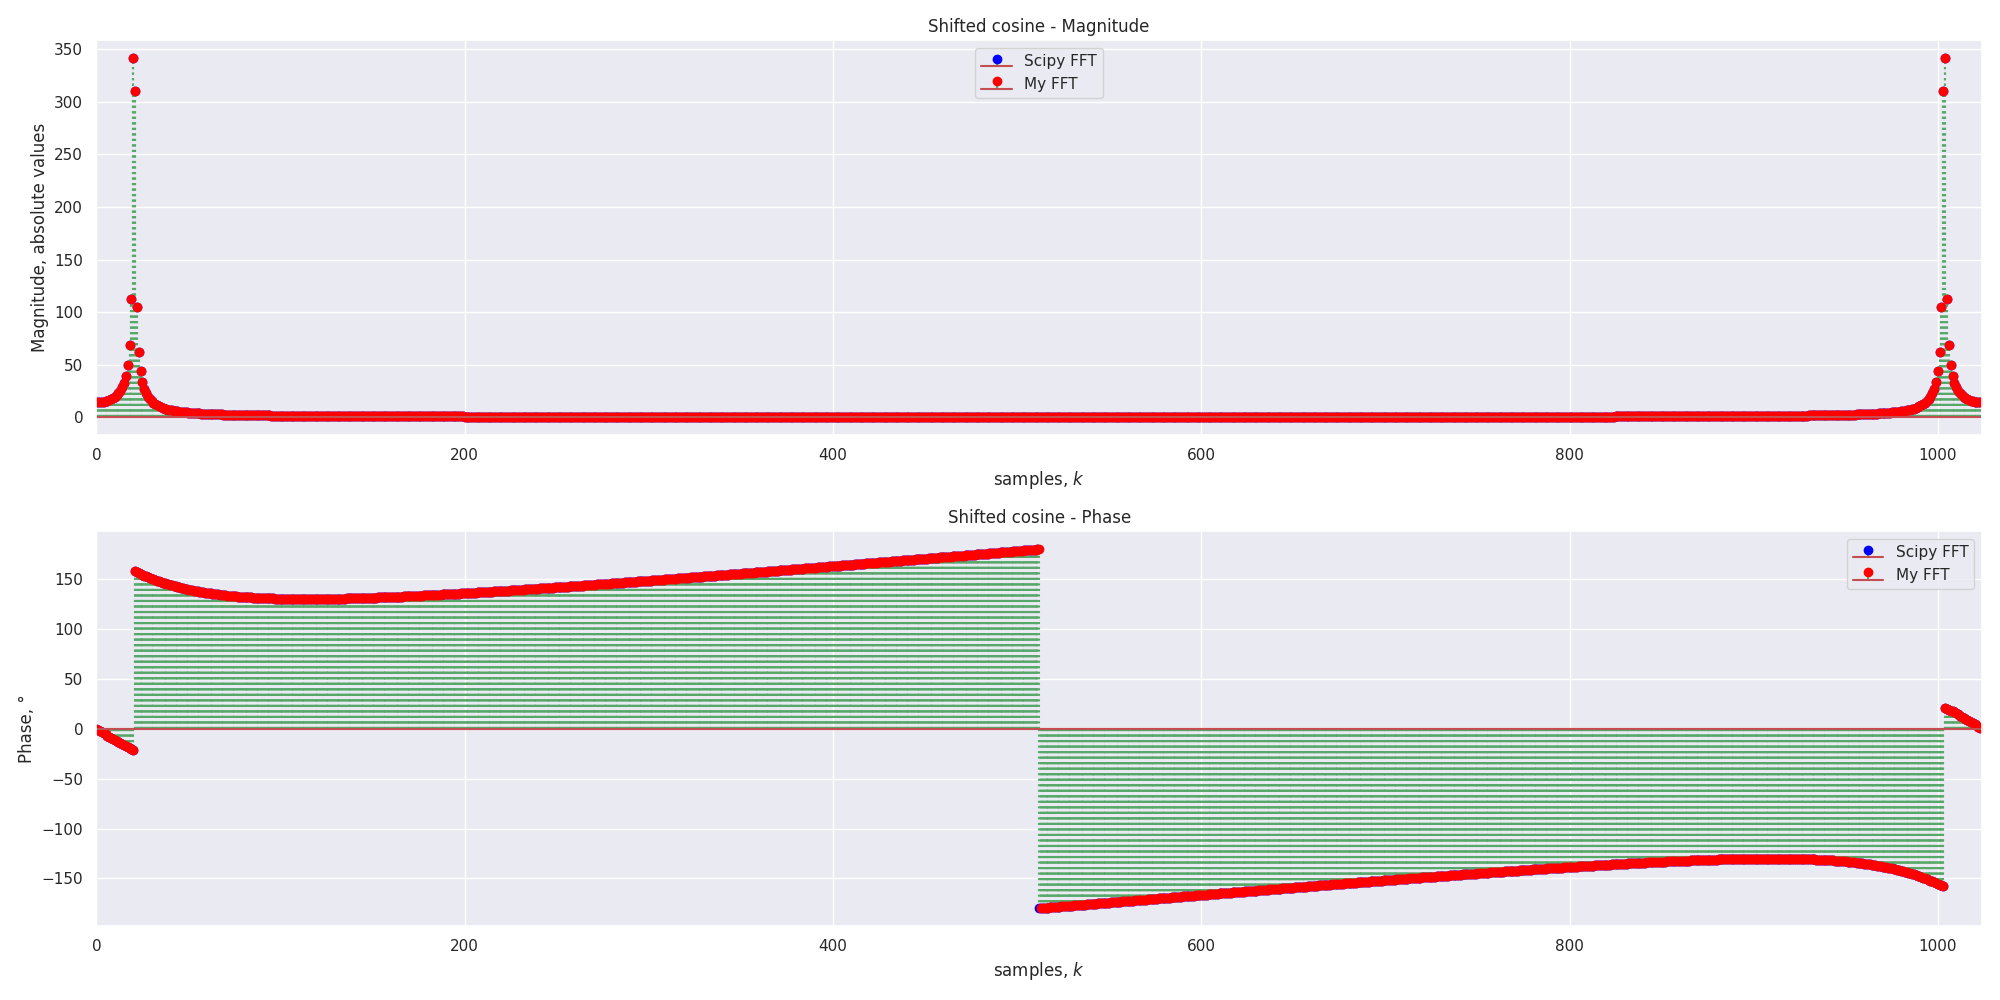

In [13]:
scipy_fft = fft(shift_cosine)
my_fft = my_fft_obj.fft_calc(shift_cosine)
plot_fft_comparison(scipy_fft, my_fft, n, 'Shifted cosine')

### Frequency Modulated Cosine
***

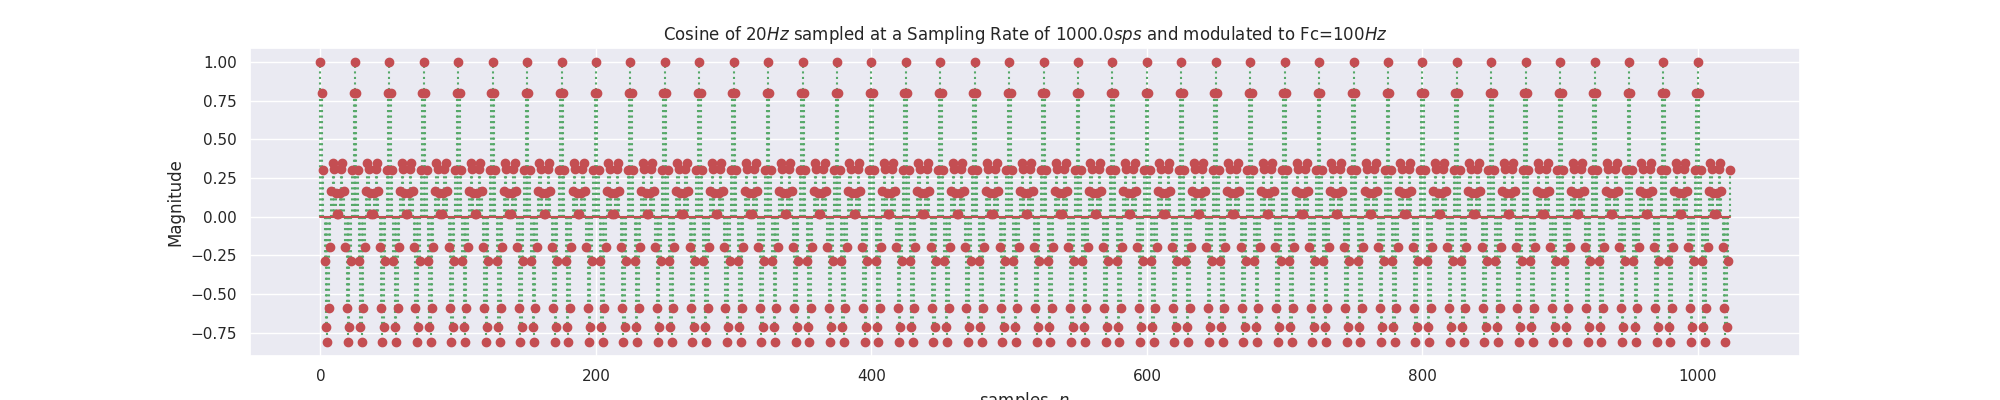

In [14]:
# Let's modulate our cosine signal.

Fc = 100 #Hz
f_Delta = 1

modulated_cosine = cosine * np.cos(2*np.pi*Fc*n/Fs)

plt.figure(figsize=(20,4))
plt.stem(n, modulated_cosine, linefmt=':g', markerfmt='ro')
plt.title(f'Cosine of ${f}Hz$ sampled at a Sampling Rate of ${Fs}sps$ and modulated to Fc=${Fc}Hz$')
plt.xlabel('samples, $n$')
plt.ylabel('Magnitude')
plt.show()


Okay, it's weird, we don't have enough values to see wit our own eyes the modulation, but the FFT will do the magic for us.

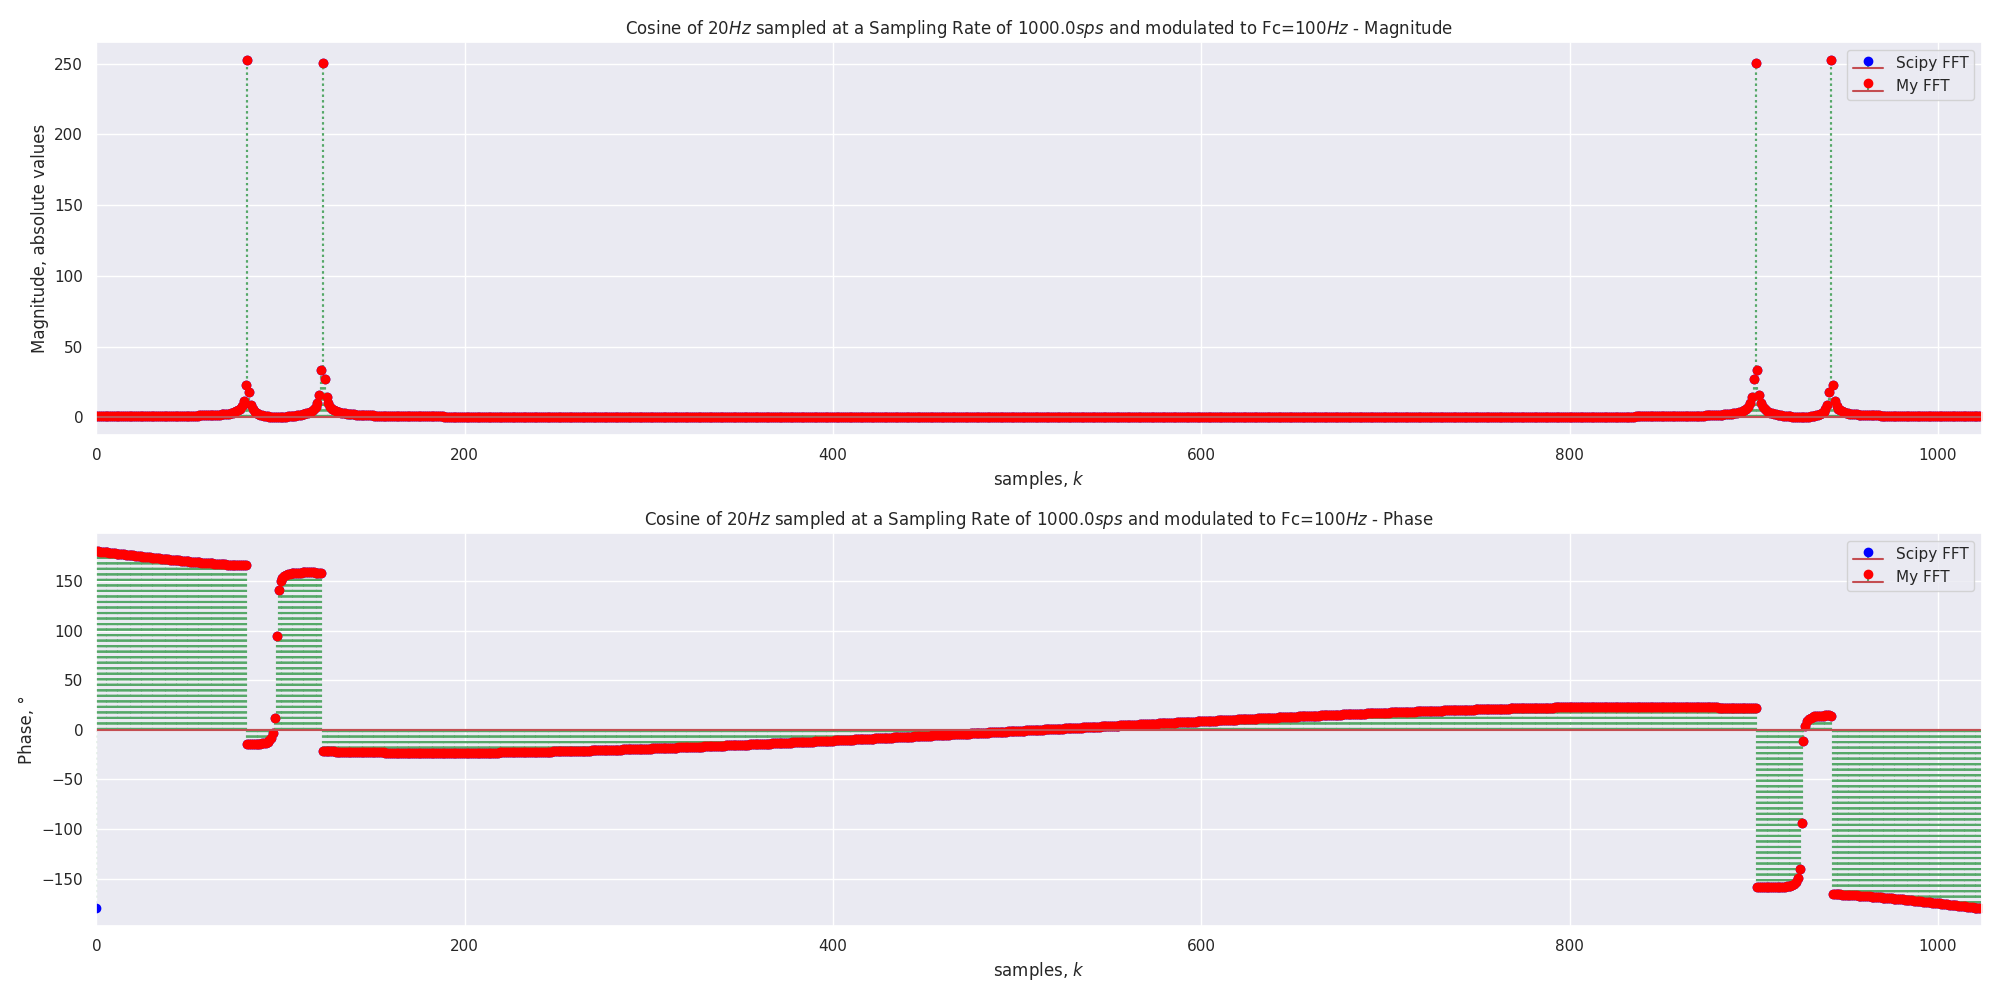

In [15]:
scipy_fft = fft(modulated_cosine)
my_fft = my_fft_obj.fft_calc(modulated_cosine)
plot_fft_comparison(scipy_fft, my_fft, n, f'Cosine of ${f}Hz$ sampled at a Sampling Rate of ${Fs}sps$ and modulated to Fc=${Fc}Hz$')

We can see that we know have two copies of the cosine spectrum centered at $\pm 100Hz$

## Evolution of computation time
***
Let's see how the time to compute the FFT increases with N

In [20]:
import time
array_N = 2**np.arange(3, 18)
time_array = np.zeros(array_N.size)
for i in range(array_N.size):
    
    my_fft_obj = FFT(array_N[i])
    n_array = np.arange(array_N[i])
    x = np.cos(2*np.pi*f*n_array/Fs)

    start_time = time.time()
    Xk = my_fft_obj.fft_calc(x)
    end_time = time.time()
    time_array[i] = end_time - start_time
    print(f'Calculated to N={array_N[i]}. Time elapsed: {time_array[i]}')


Calculated to N=8. Time elapsed: 0.002441883087158203
Calculated to N=16. Time elapsed: 0.00024771690368652344
Calculated to N=32. Time elapsed: 0.0004324913024902344
Calculated to N=64. Time elapsed: 0.001626729965209961
Calculated to N=128. Time elapsed: 0.003457307815551758
Calculated to N=256. Time elapsed: 0.004113197326660156
Calculated to N=512. Time elapsed: 0.00760197639465332
Calculated to N=1024. Time elapsed: 0.015285968780517578
Calculated to N=2048. Time elapsed: 0.026512622833251953
Calculated to N=4096. Time elapsed: 0.04603743553161621
Calculated to N=8192. Time elapsed: 0.09937620162963867
Calculated to N=16384. Time elapsed: 0.20451807975769043
Calculated to N=32768. Time elapsed: 0.4282379150390625
Calculated to N=65536. Time elapsed: 0.8773934841156006
Calculated to N=131072. Time elapsed: 1.841404676437378


In order to see the enormous difference between the FFT and the DFT with Matrix, let's compare with the value obtained to the DFT (i won't run the code again because it takes more than 10 minutes to run until the N=65536 and it crashes after it because of the size of the Matrix)

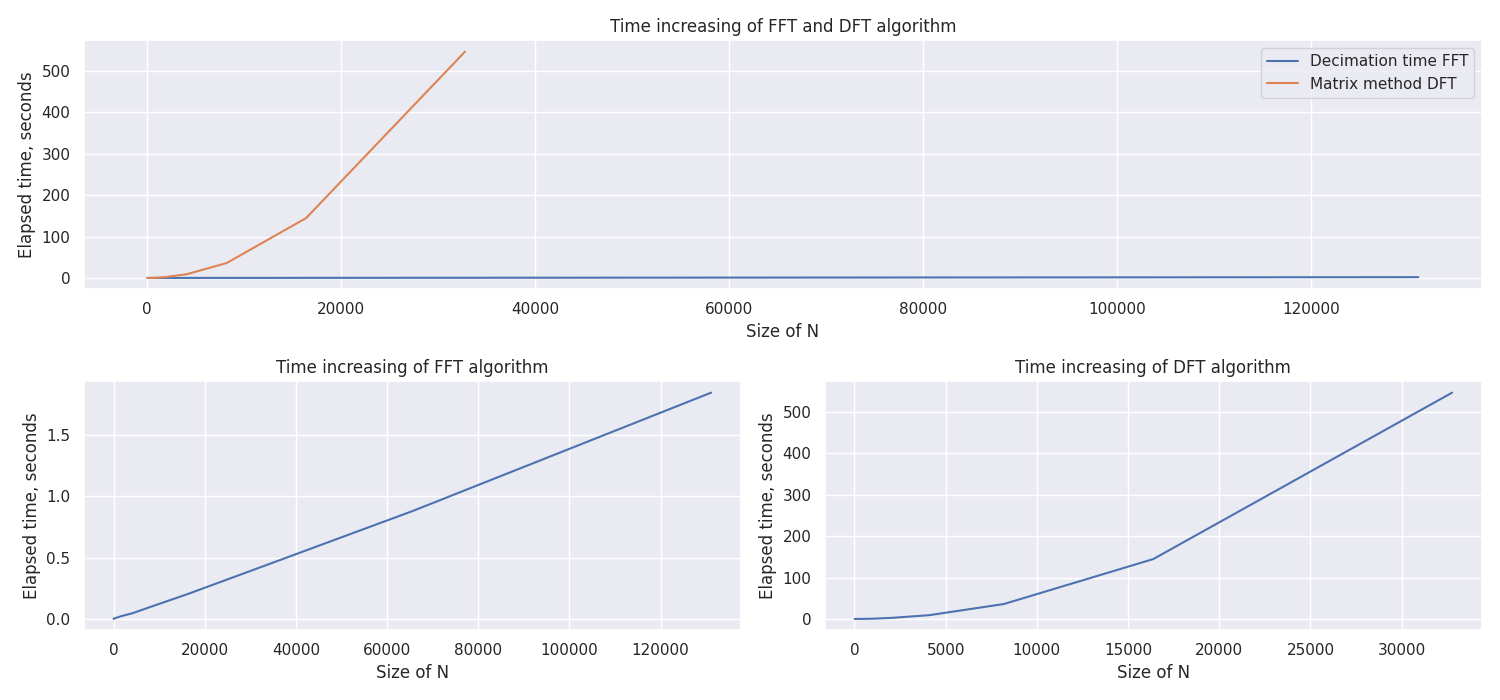

In [26]:
dft_time_array = [0.0010623931884765625, 0.0003058910369873047, 0.0006361007690429688, 0.0022628307342529297, 0.02278757095336914, 0.08022189140319824,
                 0.18950510025024414, 0.5866913795471191, 2.542628049850464, 9.09013319015503, 36.018898487091064, 144.60842967033386, 546.5402417182922]



plt.figure(figsize=(15, 7))

ax1 = plt.subplot(2, 1, 1)
ax2 = plt.subplot(2, 2, 3)
ax3 = plt.subplot(2, 2, 4)

ax1.plot(array_N, time_array)
ax1.plot(array_N[:13], dft_time_array)
ax1.set_title('Time increasing of FFT and DFT algorithm')
ax1.set_xlabel('Size of N')
ax1.set_ylabel('Elapsed time, seconds')
ax1.legend(['Decimation time FFT', 'Matrix method DFT'])



ax2.plot(array_N, time_array)
ax2.set_title('Time increasing of FFT algorithm')
ax2.set_xlabel('Size of N')
ax2.set_ylabel('Elapsed time, seconds')

ax3.plot(array_N[:13], dft_time_array)
ax3.set_title('Time increasing of DFT algorithm')
ax3.set_xlabel('Size of N')
ax3.set_ylabel('Elapsed time, seconds')

plt.tight_layout()


You are a piece of stone if that difference doesn't leave you with your mouth open. The DFT with $N = 32768$ takes TEN MINUTES to compute the result, while the FFT takes less than A HALF OF A SECOND. Now you see why the FFT is the discovery of the century.

### 